# Does weather affects my run? Using data analysis to find the answer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
from datetime import datetime
import numpy as np

In [2]:
run_data = pd.read_csv(r'C:\Users\Andy\Desktop\Learning\Dataquest\Project_Strava\activities.csv')

In [3]:
run_data.shape #352 activities with 81 column data

(352, 81)

In [4]:
run_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 81 columns):
 #   Column                                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                                    --------------  -----  
 0   Activity ID                                                                                                                                                               352 non-null    int64  
 1   Activity Date                                                                                                                                                             352 non-null    object 
 2   Activity Name                                                                                 

In [5]:
run_data.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,"<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.jump_count"">Jump Count</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.total_grit"">Total Grit</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.avg_flow"">Avg Flow</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>"
0,3421832107,"4 May 2020, 10:06:05",Evening Run,Run,NaN,1551,5.00,186.0,88.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3421832110,"3 May 2020, 10:23:01",Evening Run,Run,NaN,811,2.78,177.0,44.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3421832112,"20 Apr 2020, 09:41:32",Afternoon Run,Run,NaN,1819,4.00,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3421832113,"28 Apr 2020, 09:52:24",Afternoon Run,Run,NaN,1801,5.48,147.0,15.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3421832114,"3 May 2020, 11:03:42",Evening Run,Run,NaN,1608,5.00,184.0,92.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From a quick survey of the dataset, there are no information on some data for exmaple the weather. This is because I do not have a Strava subscription. We will need to get the weather data from other sources.

For `Activity Date`, we will need to make the following changes as by default it is synchronised to GMT+0:
* Change the format from string to datetime.
* Convert to local time (GMT+8).

In [6]:
#convert from string to datetime
run_data['Activity Date'] = pd.to_datetime(run_data['Activity Date'], format='%d %b %Y, %H:%M:%S')

#convert to local time in Singapore (GMT+8)
run_data['Activity Date'] = run_data['Activity Date'] + pd.DateOffset(hours=8)

In [7]:
run_data.tail()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,"<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.jump_count"">Jump Count</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.total_grit"">Total Grit</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.avg_flow"">Avg Flow</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>","<span class=""translation_missing"" title=""translation missing: en-GB.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>"
347,6197351390,2021-11-01 22:33:42,Night Run,Run,NaN,2284,6.26,175.0,58.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.743726,171.800003
348,6205400834,2021-11-03 17:58:47,Afternoon Run,Run,NaN,2199,6.02,182.0,65.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.737467,632.099976
349,6208589872,2021-11-04 06:03:05,Morning Run,Run,NaN,2568,6.28,175.0,45.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.445238,188.100006
350,6212987798,2021-11-05 06:51:19,Morning Run,Run,NaN,2171,6.27,173.0,51.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.887840,197.800003
351,6218271854,2021-11-06 16:39:17,Afternoon Run,Run,NaN,2277,6.27,162.0,57.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.754690,200.800003


In [8]:
#create average pace data using elapsed time and distance (min/km)
run_data['pace'] = (run_data['Elapsed Time'] / 60) / run_data['Distance']

## What time of the day do I usually run?

We will build a frequency table to visualise which part of the day do I usually run.

In [9]:
#create a frequency table (dataframe) of the activity name (which by default is based on time of run) and count
run_data_reorder = run_data['Activity Name'].value_counts().rename_axis('type_of_run').reset_index(name='counts')

#adding a Pandas Column  based conditions so that we can reorder the frequency table by time of the day of the run later
conditions = [(run_data_reorder['type_of_run'] == 'Morning Run'), (run_data_reorder['type_of_run'] == 'Lunch Run'),
             (run_data_reorder['type_of_run'] == 'Afternoon Run'), (run_data_reorder['type_of_run'] == 'Evening Run'),
             (run_data_reorder['type_of_run'] == 'Night Run')]

values = [1,2,3,4,5]

#morning run = 1, lunch run = 2, so on and forth
run_data_reorder['Period'] = np.select(conditions, values)

#sorting, starting from morning to night
run_data_reorder = run_data_reorder.sort_values(by = 'Period')

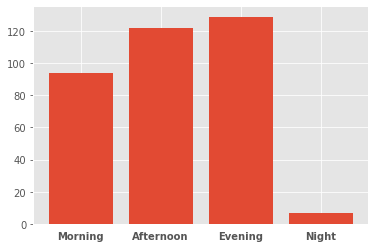

In [10]:
style.use('ggplot')

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(run_data_reorder['type_of_run'], run_data_reorder['counts'])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(['Morning','Afternoon','Evening','Night'],weight='bold')

ax.tick_params(bottom=False)

plt.show()

From above, I predominantly run in the afternoon (1400-1800) and evening (1800-0000), and rarely at night (0000-0600).

## How far do I usually run?

I will build a frequency table and plot it on a histogram to visualise this.

In [11]:
#quick overview of the frequency of the distance per run
run_data['Distance'].describe()

count    352.000000
mean       7.038153
std        3.464969
min        2.000000
25%        5.000000
50%        6.005000
75%       10.000000
max       23.000000
Name: Distance, dtype: float64

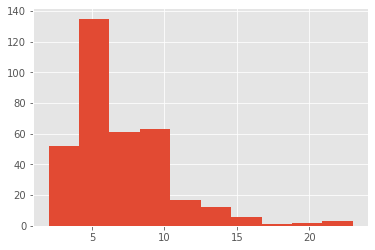

In [12]:
fig, ax = plt.subplots()
ax.hist(run_data['Distance'])

plt.show()

From above, I typically run between 4 to 6km, and rarely run beyond 10km.

## Loading weather data from other source

Due to the lack of weather data from Strava, I have extracted the daily weather data from NEA website. However, there are some limitations:
* NEA only provides weather data up till Sep 21.
* NEA only provides daily mean and max weather data and not by hour.

Hence, we will only examine whether weather has an impact on the distance I will cover in a run up till Sep 21. 

It will also not be fully accurate as the weather data is not granular enough to be by the hour (E.g the temperature when I run in early morning will likely be very different from when I run in the mid-afternoon).

In [13]:
#to find out the earliest weather data I need to get. I only started using strava in Feb 20.
run_data['Activity Date'].min()

Timestamp('2020-02-26 18:48:19')

In [14]:
#weather data from NEA are available by the month
directory = [r'\202002.csv', r'\202003.csv', r'\202005.csv', r'\202006.csv', r'\202007.csv', r'\202008.csv',
             r'\202009.csv', r'\202010.csv', r'\202011.csv', r'\202012.csv', r'\202101.csv', r'\202102.csv',
             r'\202103.csv', r'\202104.csv', r'\202105.csv', r'\202106.csv', r'\202107.csv', r'\202108.csv', 
             r'\202109.csv', ]

#there are some issues with the header row for 202002 and 202003, so we will use 202004 as the first block of data to use its
#header row`
start = pd.read_csv(r'C:\Users\Andy\Desktop\Learning\Dataquest\Project_Strava\temp\202004.csv')

#use a for loop to concatenate each of the monthly weather csv data
for d in directory:
    path = r'C:\Users\Andy\Desktop\Learning\Dataquest\Project_Strava\temp'
    add = pd.read_csv(path+d)
    add.columns = start.columns #using the original header taken from 202004
    full = pd.concat([start, add])
    start = full

In [15]:
#found another source of temperature from data.gov.sg (hourly wet bulb)
hourly_temp = pd.read_csv(r'C:\Users\Andy\Desktop\Learning\Dataquest\Project_Strava\wet-bulb-temperature-hourly.csv')

#convert date from string to datetime
hourly_temp['wbt_date'] = pd.to_datetime(hourly_temp['wbt_date'], format='%Y-%m-%d')

#creating new separate columns for year, month, day. For referencing and merging with run data later.
hourly_temp['Year'] = hourly_temp['wbt_date'].dt.year
hourly_temp['Month'] = hourly_temp['wbt_date'].dt.month
hourly_temp['Day'] = hourly_temp['wbt_date'].dt.day

hourly_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348432 entries, 0 to 348431
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   wbt_date              348432 non-null  datetime64[ns]
 1   wbt_time              348432 non-null  int64         
 2   wet_bulb_temperature  348432 non-null  float64       
 3   Year                  348432 non-null  int64         
 4   Month                 348432 non-null  int64         
 5   Day                   348432 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 16.0 MB


In [16]:
#simplifiying the header row
full_weather = full.rename(columns={'Mean Temperature (°C)': 'Mean_Temp', 'Maximum Temperature (°C)': 'Max_Temp', 
                            'Minimum Temperature (°C)': 'Min_Temp', 'Mean Wind Speed (km/h)': 'Mean_Wind',
                            'Max Wind Speed (km/h)': 'Max_Wind'})
full_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Station                        608 non-null    object
 1   Year                           608 non-null    int64 
 2   Month                          608 non-null    int64 
 3   Day                            608 non-null    int64 
 4   Daily Rainfall Total (mm)      608 non-null    object
 5   Highest 30 min Rainfall (mm)   608 non-null    object
 6   Highest 60 min Rainfall (mm)   608 non-null    object
 7   Highest 120 min Rainfall (mm)  608 non-null    object
 8   Mean_Temp                      608 non-null    object
 9   Max_Temp                       608 non-null    object
 10  Min_Temp                       608 non-null    object
 11  Mean_Wind                      608 non-null    object
 12  Max_Wind                       608 non-null    object
dtypes: int

In [17]:
full_weather['Mean_Temp'].value_counts()

27.9        23
-           19
27.4        19
28.2        19
28.1        18
            ..
    26.0     1
    25.4     1
    27.2     1
23.6         1
    29.4     1
Name: Mean_Temp, Length: 95, dtype: int64

In [18]:
#initially I had assumed only one data point is missing, but in fact there's more. NEED TO RE-WORK THIS PART.
#filling in missing data for temp and wind, referencing another station readings
full_weather.loc[full_weather['Mean_Temp'] == '-', 'Mean_Temp'] = 26.6
full_weather.loc[full_weather['Max_Temp'] == '-', 'Max_Temp'] = 30.2
full_weather.loc[full_weather['Min_Temp'] == '-', 'Min_Temp'] = 24.5
full_weather.loc[full_weather['Mean_Wind'] == '-', 'Mean_Wind'] = 6.9
full_weather.loc[full_weather['Max_Wind'] == '-', 'Max_Wind'] = 24.1

In [19]:
#convert from string to float
full_weather['Mean_Temp'] = full_weather['Mean_Temp'].astype(float)
full_weather['Mean_Wind'] = full_weather['Mean_Wind'].astype(float)

In [20]:
#creating new separate columns based on date of activity. For referencing and merging with weather data.
run_data['Year'] = run_data['Activity Date'].dt.year
run_data['Month'] = run_data['Activity Date'].dt.month
run_data['Day'] = run_data['Activity Date'].dt.day
run_data['wbt_time'] = run_data['Activity Date'].dt.hour

In [21]:
#merging the run data with weather data based on the date of activity
#e.g: df_2 = pd.merge(df_2, df_1, on=['State', 'Month'], how='left') 

run_data = pd.merge(run_data, full_weather, on=['Year','Month','Day'], how='left')
run_data = pd.merge(run_data, hourly_temp, on=['Year','Month','Day','wbt_time'], how='left')

run_data.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean_Temp,Max_Temp,Min_Temp,Mean_Wind,Max_Wind,wbt_date,wet_bulb_temperature
0,3421832107,2020-05-04 18:06:05,Evening Run,Run,NaN,1551,5.00,186.0,88.0,False,...,0.2,0.2,0.2,27.8,30.9,26.1,13.0,29.8,2020-05-04,25.4
1,3421832110,2020-05-03 18:23:01,Evening Run,Run,NaN,811,2.78,177.0,44.0,False,...,4.4,5.6,5.8,28.6,33.1,25.2,9.8,26.3,2020-05-03,26.4
2,3421832112,2020-04-20 17:41:32,Afternoon Run,Run,NaN,1819,4.00,NaN,NaN,False,...,0.0,0.0,0.0,30.0,34.5,27.2,17.9,37.0,2020-04-20,25.7
3,3421832113,2020-04-28 17:52:24,Afternoon Run,Run,NaN,1801,5.48,147.0,15.0,False,...,0.0,0.0,0.0,28.4,31.8,26.0,10.9,25.9,2020-04-28,25.3
4,3421832114,2020-05-03 19:03:42,Evening Run,Run,NaN,1608,5.00,184.0,92.0,False,...,4.4,5.6,5.8,28.6,33.1,25.2,9.8,26.3,2020-05-03,26.4


In [22]:
#since we only have weather data until Sep 2021, 
#we will isolate the running data till this date in order to do analysis with weather

end_date = datetime.strptime('2021-09-30', '%Y-%m-%d')
run_data_till_sep21 = run_data[run_data['Activity Date'] <= end_date]

In [23]:
run_data_till_sep21.tail()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean_Temp,Max_Temp,Min_Temp,Mean_Wind,Max_Wind,wbt_date,wet_bulb_temperature
329,5964157211,2021-09-15 18:13:20,Evening Run,Run,NaN,2303,6.25,183.0,58.0,False,...,0.0,0.0,0.0,28.8,34.2,25.7,14.2,44.3,2021-09-15,25.8
330,5974172601,2021-09-17 18:56:44,Evening Run,Run,NaN,2763,8.10,181.0,77.0,False,...,0.0,0.0,0.0,29.0,33.9,25.2,18.9,45.4,2021-09-17,25.8
331,5979042843,2021-09-18 17:31:18,Afternoon Run,Run,NaN,3710,10.18,204.0,97.0,False,...,0.0,0.0,0.0,28.7,33.4,26.1,15.2,38.5,2021-09-18,25.0
332,5990244569,2021-09-20 18:48:41,Evening Run,Run,NaN,3622,10.40,151.0,61.0,False,...,0.0,0.0,0.0,28.4,32.4,24.4,9.8,25.2,2021-09-20,24.4
333,6021099203,2021-09-26 16:34:03,Afternoon Run,Run,NaN,2847,8.18,181.0,86.0,False,...,0.4,0.4,0.4,27.9,32.3,25.1,17.8,46.1,2021-09-26,25.6


In [24]:
#finding weather data for specific day
#full_weather[(full_weather['Year'] == 2021) & (full_weather['Month'] == 11) & (full_weather['Day'] == 6)]

#finding wbt for specific day
#hourly_temp[(hourly_temp['Year'] == 2020) & (hourly_temp['Month'] == 5) & (hourly_temp['Day'] == 3) &
#            (hourly_temp['wbt_time'] == 18)]

# Impact on my running distance

## Do I cut my run short if it is hot?

In [35]:
run_data_till_sep21.corr()['Distance'][['wet_bulb_temperature']]

wet_bulb_temperature   -0.144415
Name: Distance, dtype: float64

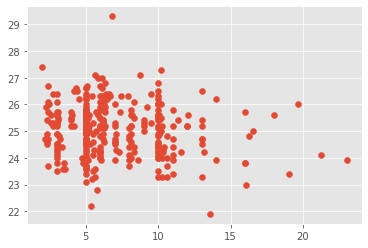

In [36]:
fig, ax = plt.subplots()
ax.scatter(run_data_till_sep21['Distance'], run_data_till_sep21['wet_bulb_temperature'])

plt.show()

While we may expect a run to be shorter if the temperature is higher, the data indicates a weak negative correlation.

However, we should note the earlier caveat that this may not be fully accurate as the weather data is not granular enough to be by the hour.

## Do I get carried or get stopped by the wind?

In [27]:
run_data_till_sep21.corr()['Distance'][['Mean_Wind']]

Mean_Wind    0.197786
Name: Distance, dtype: float64

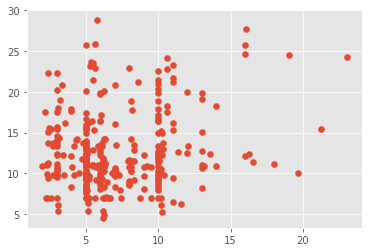

In [28]:
fig, ax = plt.subplots()
ax.scatter(run_data_till_sep21['Distance'], run_data_till_sep21['Mean_Wind'])

plt.show()

Similarly, the data indicates a weak correlation and does not seemed to indicate that wind speed had an impact on my distance.

Again, we should note the caveat that this may not be fully accurate.

## The longer I run, the more effort required?

In [29]:
run_data.corr()['Distance'][['Relative Effort']]

Relative Effort    0.89584
Name: Distance, dtype: float64

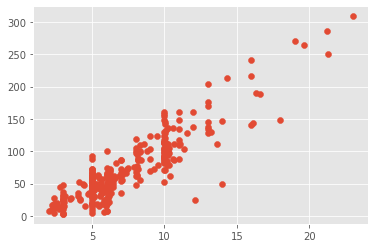

In [30]:
fig, ax = plt.subplots()
ax.scatter(run_data['Distance'], run_data['Relative Effort'])

plt.show()

As expected, there is a strong positive correlation between distance and relative effort. We would expect a higher exertion as the distance increases.

Not surprising as based on Strava, the more time you spend going full gas and the longer the activity, the higher the relative effort.

# Impact on my pace

## Do I run slower if it is hot?

In [37]:
run_data_till_sep21.corr()['pace'][['wet_bulb_temperature']]

wet_bulb_temperature   -0.047066
Name: pace, dtype: float64

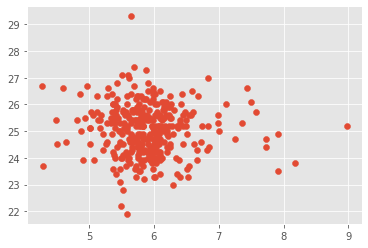

In [38]:
fig, ax = plt.subplots()
ax.scatter(run_data_till_sep21['pace'], run_data_till_sep21['wet_bulb_temperature'])

plt.show()

Again, a weak correlation between pace and daily mean temperature.

## Do I run faster if it is windy?

In [33]:
run_data_till_sep21.corr()['pace'][['Mean_Wind']]

Mean_Wind    0.167602
Name: pace, dtype: float64

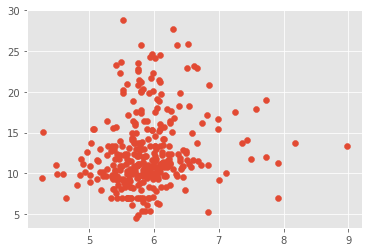

In [34]:
fig, ax = plt.subplots()
ax.scatter(run_data_till_sep21['pace'], run_data_till_sep21['Mean_Wind'])

plt.show()

Similarly, a weak correlation between pace and windspeed.

# Conclusion

Preliminary from the data available, weather does not have a significant impact on the distance or pace. However, we note that due to the limitation in the granularity of weather data, this may not be entirely accurate.